In [1]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import random
import seaborn as sns
from wordfreq import word_frequency as wf 

In [2]:
Word_Bank_File_Name = 'words.csv'
Historical_File_Name = 'historical.txt'

In [3]:
#12000 word file stored as words_12k
words_12k=pd.read_csv('data/'+Word_Bank_File_Name)['words'].str.upper()

words_refine=open('data/words_refine.txt','r').read().split('\n')



#Historical Words stored as words_historicals
historicals_txt=open('data/'+Historical_File_Name,'r').readlines()[0]
words_historicals=pd.DataFrame(historicals_txt.split(" "),columns=['words'])['words'].str.upper()



True

In [4]:
def unique(list1):
  
    
    unique_list = []
  
    
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return unique_list
    


def getCharDistribution(word_list):
    Chars_List={}
    for word in words['words']:
        chars=unique([*word])
        for c in chars:
            if c not in Chars_List:
                Chars_List[c]=0
            Chars_List[c]+=1
    Sorted_Chars=dict(sorted(Chars_List.items(),key=lambda x:x[1],reverse=True))
    
    return Sorted_Chars
    

def getMaxFreq(word_corpus):
    
    Old=wf(word_corpus[0],'en')
    Word_Track=word_corpus[0]
    
    for word in word_corpus:
        New=max(wf(word,'en'),Old)
        if(New>Old):
            Word_Track=word
        
        Old=New
        
    return Word_Track



In [5]:
class WordleSim:
    
    ##Initializes the state 2D array, with [guess letter, state]
    ## 0: Not in Word
    ## 1: Yellow
    ## 2: Green
    ## 
    
    def __init__(self,word):
        self.source_word=word.upper()
        self.num_tries=0
        self.Game_State=[[]]
        self.win=False
        
        for i in range(0,4):
            self.Game_State.append(["",-1])
        

    def __str__(self, word):
        self.source_word=word.upper()
        self.num_tries=0
        
    def play(self,guess):
        Char_List=[*guess.upper()]
        
        for i in range(0,len(Char_List)):
            state_var=0
            if Char_List[i]==[*self.source_word][i]:
                state_var=2
                
            elif Char_List[i] in [*self.source_word]:
                state_var=1
            
            self.Game_State[i]=[Char_List[i],state_var]
            
        self.num_tries+=1
        
        #################
        
        if self.source_word==guess:
            self.win=True
            
            
        return self.Game_State, self.num_tries, self.win
        
    def getTries(self):
        return self.num_tries
    

In [6]:
def wordscore(letters,word):
    
    score=0
    
    for l in range(0,len(letters)):
        
        if letters[l] in word:
            
            score+=1
    
    if score>=2:
        return score
    else:
        return None
    
    
def sortDict(Dict):
    '''THis method sorts a dictionary by the descending order of
        its values'''
    
    keys=[]
    values=[]
    
    for key in Dict:
        keys.append(key)
        values.append(Dict[key])
    
    
    #Implementing a combined bubble sort now
    #Descending Order
    
    Not_Sorted=True  #WinCondition Holder
    
    while(Not_Sorted):
        
        Not_Sorted=False          #As soon as we have to make a swap, this will become true
        
        for i in range(1,len(keys)):
            Prev=values[i-1]
            PrevK=keys[i-1]
            
            This=values[i]
            ThisK=keys[i]
            
            if(This>Prev):                 #Swap condition
                
                values[i]=Prev
                values[i-1]=This
                
                
                keys[i]=PrevK
                keys[i-1]=ThisK
                
                
                
                Not_Sorted=True
    
    ReturnDict={}
    
    for i in range(0,len(keys)):
        
        ReturnDict[keys[i]]=values[i]
        
    
    return ReturnDict
        
    
    

In [7]:
class RandomSolver(WordleSolver):
    

    def generate(self):
        return random.choice(self.word_list)

NameError: name 'WordleSolver' is not defined

In [22]:
#Changed up solver
class WordleSolver:




    def __init__(self, file_loc="data/words.txt"):
        with open(file_loc,'r') as f:
            word_list = f.read().upper().split('\n')

        word_list.sort()
        self.word_list = word_list
        self.original_list=word_list
        self.correct_chars=[]
        self.notTieBreak=True
        
        self.randomizer="111000000000"
    
    
        #TieBreakVars
        self.used_chars=[]
        self.correct_chars=[]
        self.guesses=0
    
    
    
    
    def measure_distribution(self):
        dist_list = [{},{},{},{},{}]
        for i,word in enumerate(self.word_list):
            for j,letter in enumerate(word):
                dict = dist_list[j]
                if letter in dict:
                    dict[letter] = dict[letter]+1
                else:
                    dict[letter] = 1

        return dist_list
    
    def measure_frequency(self):
        letters = "".join(self.word_list)
        dict_freq = {}

        for i in range(60,91):
            dict_freq[chr(i)] = 0

        for i in letters:
            dict_freq[i] = dict_freq[i] + 1

        return dict_freq

    def generate_random(self):
        return random.choice(self.word_list)
    
    def generate_frequency(self):

        #Generates a word based on frequency ranker
        guess_word = ""
        max_score = 0
        dist_list = self.measure_frequency()

        for word in self.word_list:
            score = 0
            for j,letter in enumerate(word):
                score = score + dist_list[letter]
            
            if(score>max_score):
                max_score = score
                guess_word = word
        
        return guess_word

    def generate_frequency_wp(self):

        #Generates a word based on frequency ranker
        guess_word = ""
        max_score = 0
        dist_list = self.measure_frequency()

        for word in self.word_list:
            score = 0
            for j,letter in enumerate(word):
                if(letter not in word[:j]):
                    score = score + dist_list[letter]
            
            if(score>max_score):
                max_score = score
                guess_word = word
        
        return guess_word
    
    def generate_bucket(self):

        #Generates a word based on bucket ranker
        guess_word = ""
        max_score = 0
        dist_list = self.measure_distribution()

        for i,word in enumerate(self.word_list):
            score = 0
            for j,letter in enumerate(word):
                score = score + dist_list[j][letter]
            
            if(score>max_score):
                max_score = score
                guess_word = word
        
        return guess_word
    
    def generate_bucket_wp(self):

        #Generates a word based on bucket ranker with penalty
        guess_word = ""
        max_score = 0
        dist_list = self.measure_distribution()

        for i,word in enumerate(self.word_list):
            score = 0
            for j,letter in enumerate(word):
                if(letter not in word[:j]):
                    score = score + dist_list[j][letter]
            
            if(score>max_score):
                max_score = score
                guess_word = word
        
        return guess_word
################################################################

        
        
        

    def generate_mixed_wp(self):
        self.guesses+=1
        word1=self.generate_bucket_wp()
        word2=getMaxFreq(self.word_list)

        Path=self.randomizer[0]
        self.randomizer=self.randomizer[1:]
        
        
        
        
        if(Path=='1'):
            returner=word1
        else:
            returner=word2
        
        
        #TieBreak
        
        
            
            
        
        return returner


                    




    def update(self, info=[]):
        new_word_list = []
        
        
        
        #Update correct_chars:
        if(len(info)>0):
            
            for char,value in info:
                if value==2:
                    if char in self.correct_chars:
                        x=0
                    else:
                        
                        self.correct_chars.append(char)
        
        
        for i,word in enumerate(self.word_list):
            f = 0
            for j,value in enumerate(info):
                letter = value[0]
                letter_info = value[1]

                if(letter in word):
                    if(letter_info==0):
                        f=1
                        break
                    elif(letter_info==1 and word[j]==letter):
                        f=1
                        break
                    elif(letter_info==2 and word[j]!=letter):
                        f=1
                        
                        break
                    
                else:
                    if(letter_info>=1):
                        f=1
                        break
            if(f==0):
                new_word_list.append(word)
        self.word_list = new_word_list
    
    def len_list(self):
        return len(self.word_list)
    
    def return_list(self):

        ret_list=self.word_list.copy()
        random.shuffle(ret_list)
        return ret_list

    def reset(self, file_loc="data/words.txt"):
        with open(file_loc,'r') as f:
            word_list = f.read().upper().split('\n')

        word_list.sort()
        self.word_list = word_list

In [25]:
class exp_WordleSolver:



    def __init__(self, file_loc="data/words_refine.txt"):
        
        with open(file_loc,'r') as f:
            word_list = f.read().upper().split('\n')
        
        word_list.sort()
        self.word_list = word_list
        self.original_list=word_list
        self.correct_chars=[]
        self.notTieBreak=True
        
        self.randomizer="111000000000"
    
    
        #TieBreakVars
        self.used_chars=[]
        self.correct_chars=[]
        self.guesses=0
    
    
    
    
    def measure_distribution(self):
        dist_list = [{},{},{},{},{}]
        for i,word in enumerate(self.word_list):
            for j,letter in enumerate(word):
                dict = dist_list[j]
                if letter in dict:
                    dict[letter] = dict[letter]+1
                else:
                    dict[letter] = 1

        return dist_list
    
    def measure_frequency(self):
        letters = "".join(self.word_list)
        dict_freq = {}

        for i in range(60,91):
            dict_freq[chr(i)] = 0

        for i in letters:
            dict_freq[i] = dict_freq[i] + 1

        return dict_freq

    def generate_random(self):
        return random.choice(self.word_list)
    
    def generate_frequency(self):

        #Generates a word based on frequency ranker
        guess_word = ""
        max_score = 0
        dist_list = self.measure_frequency()

        for word in self.word_list:
            score = 0
            for j,letter in enumerate(word):
                score = score + dist_list[letter]
            
            if(score>max_score):
                max_score = score
                guess_word = word
        
        return guess_word

    def generate_frequency_wp(self):

        #Generates a word based on frequency ranker
        guess_word = ""
        max_score = 0
        dist_list = self.measure_frequency()

        for word in self.word_list:
            score = 0
            for j,letter in enumerate(word):
                if(letter not in word[:j]):
                    score = score + dist_list[letter]
            
            if(score>max_score):
                max_score = score
                guess_word = word
        
        return guess_word
    
    def generate_bucket(self):

        #Generates a word based on bucket ranker
        guess_word = ""
        max_score = 0
        dist_list = self.measure_distribution()

        for i,word in enumerate(self.word_list):
            score = 0
            for j,letter in enumerate(word):
                score = score + dist_list[j][letter]
            
            if(score>max_score):
                max_score = score
                guess_word = word
        
        return guess_word
    
    def generate_bucket_wp(self):

        #Generates a word based on bucket ranker with penalty
        guess_word = ""
        max_score = 0
        dist_list = self.measure_distribution()

        for i,word in enumerate(self.word_list):
            score = 0
            for j,letter in enumerate(word):
                if(letter not in word[:j]):
                    score = score + dist_list[j][letter]
            
            if(score>max_score):
                max_score = score
                guess_word = word
        
        return guess_word
    
################################################################

    def tieBreak(self):
        
        
        
        if(len(self.word_list)>2 and self.guesses>4):
            return ''
    
        
        #List of remaining letters
        Letters=self.getRemLetters()
        Letters,Ranks=self.rankRemLetters(Letters)
        
        
        #Now letters are sorted, lets get max score
        maxscore=0
        ret_word=''
        
        
        Word_Scores={}
        
            
            
            
        for word in self.original_list:
            score=0
            
            for L in Letters:
            
                if L in word:
                    
                    score+=1*Ranks[L]
            

            if score>2:
                Word_Scores[word]=score
                    
                
        Word_Scores=sortDict(Word_Scores)
        
        if(len(Word_Scores)>0):
            return list(Word_Scores.keys())[0]
        else:
            
            return ''
        
        
    def checkTie(self):
        
        guess_word = ""
        max_score = 0
        dist_list = self.measure_distribution()
        Score_Dict={}

        for i,word in enumerate(self.word_list):
            score = 0
            for j,letter in enumerate(word):
                score = score + dist_list[j][letter]
                
            
            Score_Dict[word]=score
        
        
        #print(np.std(list(Score_Dict.values())))
        if np.std(list(Score_Dict.values()))<=2 and len(Score_Dict)>0:
            
            return True
        
        else:
            return False
        
        

    def generate_mixed_wp(self):
        self.guesses+=1
        word1=self.generate_bucket_wp()
        word2=getMaxFreq(self.word_list)

        Path=self.randomizer[0]
        self.randomizer=self.randomizer[1:]
        
        
        
        
        if(Path=='1'):
            returner=word1
        else:
            returner=word2
        
        
        #TieBreak
        
        if(self.checkTie()==True):
            word3=self.tieBreak()
            
            #print(self.word_list)
            

            
            if(len(word3)>0):
                returner=word3
    
        
        
        
        
        
        #Update usechars
        
        for char in returner:
            
            if char in self.used_chars:
                x=0
                
            else:
                self.used_chars.append(char)
            
            
            

            
        return returner

    
    
    
    def rankRemLetters(self, Letters):
        
        Ranks={Letters[i]:0 for i in range(0,len(Letters))}
           
        
        for each in range(0,len(Letters)):
            
            for word in self.word_list:
                
                if(Letters[each] in word):
                    
                    Ranks[Letters[each]]+=1
        
        #Now to do a Descending Bubblesort on a dict
        
        Ranks=sortDict(Ranks)

        
                    
        return list(Ranks.keys()),Ranks
     
    
    
    
    def getRemLetters(self):
        
        #List of all chars, unprioritized
        
        RetList=[]
        
        
        for word in self.word_list:
            
            for char in word:
                
                occurences={}
                
                #Case 1: Double char but it has been guessed
                if char in self.correct_chars:
                    
                    #repeat checker
                    if char in occurences:
                        RetList.append(char)
                        
                    else:
                        occurences[char]=1
                
                elif (char in self.used_chars)==False:
                    
                    if (char in RetList)==False:
                        
                        RetList.append(char)  

        

        return RetList
                    




    def update(self, info=[]):
        new_word_list = []
        
        
        #Update correct_chars:
        if(len(info)>0):
            
            for char,value in info:
                if value==2:
                    if char in self.correct_chars:
                        x=0
                    else:
                        self.correct_chars.append(char)
        
        
        for i,word in enumerate(self.word_list):
            f = 0
            for j,value in enumerate(info):
                letter = value[0]
                letter_info = value[1]

                if(letter in word):
                    if(letter_info==0):
                        f=1
                        break
                    elif(letter_info==1 and word[j]==letter):
                        f=1
                        break
                    elif(letter_info==2 and word[j]!=letter):
                        f=1
                        
                        break
                    
                else:
                    if(letter_info>=1):
                        f=1
                        break
            if(f==0):
                new_word_list.append(word)
                
                
        self.word_list = new_word_list
    
    def len_list(self):
        return len(self.word_list)
    
    def return_list(self):

        ret_list=self.word_list.copy()
        random.shuffle(ret_list)
        return ret_list

    def reset(self, file_loc="data/words.txt"):
        with open(file_loc,'r') as f:
            word_list = f.read().upper().split('\n')

        word_list.sort()
        self.word_list = word_list

In [26]:
TestL=['EVADE', 'HATCH', 'SEVER']




Solver=exp_WordleSolver()
Sim=WordleSim('DROLL')
guesses=0
while not Sim.win and guesses<10:
    
    guesses+=1
    
    guess=Solver.generate_mixed_wp()
    State=Sim.play(guess)[0]
    Solver.update(State)
    
    print('Guess: '+guess)
    print()
    print('List Size: '+str(len(Solver.word_list)))


    
    
    
    

print()


Guess: CARES

List Size: 211
Guess: IRONY

List Size: 29
Guess: BROTH

List Size: 14
Guess: GROUP

List Size: 3
Guess: DROOL

List Size: 1
Guess: DROLL

List Size: 1



In [11]:

def Six_Tries_Test(word_corpus):
    
    Avg_Tries=[]
    Success_Counter=0
    Shitty=[]
    
    for w in word_corpus:

        Sim=WordleSim(str(w))
        Solver=exp_WordleSolver()

        while(Sim.num_tries<6):
            
            guess=Solver.generate_mixed_wp()
            

            Sim_Output=Sim.play(guess)
            Solver.update(Sim_Output[0])
            
            
            
            if(Sim.win==True):
                Success_Counter+=1
                
                break
                
                
        if(Sim.win==False):
            Shitty.append(w)
            
        
            
        
        
        

    return Success_Counter, Success_Counter/len(word_corpus),Shitty

In [153]:
List=[5 for i in range(0,10)]

print(1 in List)



False


In [29]:
def Any_Tries_Test(word_corpus):

    Avg_Tries=[]
    Big_Tries=[]
    Tiebreaks=0
    

    for w in word_corpus:
        Sim=WordleSim(str(w))
        Solver=exp_WordleSolver()
        

        while(Sim.win==False):
            
            Sim_Output=Sim.play(Solver.generate_mixed_wp())
            Solver.update(Sim_Output[0])
            
        if(not Solver.notTieBreak):
            Tiebreaks+=1


        
        Avg_Tries.append(Sim.getTries())
        
        if(Sim.getTries()>6):
            Big_Tries.append(w)
    
    
    
    sns.distplot(Avg_Tries)
    print('Avg Tries: '+ str(np.mean(Avg_Tries)))
    
    return Avg_Tries,Big_Tries

In [27]:
Result2=Six_Tries_Test(words_historicals)
print(Result2)

(426, 1.0, [])


In [ ]:
Any_Tries_Test(words_historicals)

In [183]:
Missed=Result2[2]
print('Missed Words')
print('------------------')
print()
print(Missed)



Missed Words
------------------

['EVADE', 'HATCH', 'SEVER']
3


Avg Tries: 7.0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


([7, 7, 7], ['EVADE', 'HATCH', 'SEVER'])

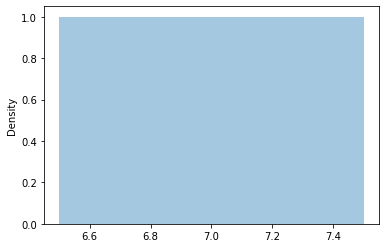

In [186]:
Any_Tries_Test(Missed)

In [67]:
Guesses=[]

for word in Missed:
    
    Sim=WordleSim(str(word))
    Solver= WordleSolver()
    
    print('Word: '+word)
    gcount=0
    
    thisHit=True
    
    while(Sim.win==False):
        
        print()
        
        guess=Solver.generate_mixed_wp()
        
        
        Sim_Output=Sim.play(guess)

        Solver.update(Sim_Output[0])
        
        gcount+=1
        
        
            
        
        print()
        print(guess)
        
    
            
        
    Guesses.append(gcount)
    print('------------------')

    

Word: LOWES


CARES


LINES


LODES


LOVES


LOSES


LOBES


LOWES
------------------
Word: WRYER


CARES


TONER


FIVER


UPPER


ELDER


WEBER


WRYER
------------------
Word: BOYOS


CARES


BOLTS


BONKS


BOMBS


BOGUS


BOZOS


BOYOS
------------------
Word: HINGS


CARES


BOLTS


MUNGS


WINGS


KINGS


SINGS


PINGS


DINGS


ZINGS


HINGS
------------------
Word: JIBER


CARES


TONER


FIVER


WIDER


PIPER


MIXER


BIKER


LIBER


GIBER


JIBER
------------------
Word: MUIDS


CARES


BOLTS


MUNGS


MUMPS


MUFFS


MUSKS


MUIDS
------------------
Word: WARKS


CARES


HARKS


BARKS


MARKS


PARKS


LARKS


DARKS


WARKS
------------------
Word: YOCKS


CARES


DOCKS


BOCKS


SOCKS


LOCKS


MOCKS


JOCKS


HOCKS


TOCKS


POCKS


NOCKS


WOCKS



IndexError: string index out of range

In [ ]:
print("Missed Words with TieBreak")
print(np.mean(Guesses))
sns.distplot(Guesses,bins=10)

In [314]:
class WordleSolver2:

    randomizer="111000000000"
    
    used_chars=[]
    correct_chars=[]
    notTieBreak=True
    guesses=0


    def __init__(self, file_loc="data/words.txt"):
        with open(file_loc,'r') as f:
            word_list = f.read().upper().split('\n')

        word_list.sort()
        self.word_list = word_list
        self.original_list=word_list
        self.correct_chars=[]
        self.notTieBreak=True
    
    def measure_distribution(self):
        dist_list = [{},{},{},{},{}]
        for i,word in enumerate(self.word_list):
            for j,letter in enumerate(word):
                dict = dist_list[j]
                if letter in dict:
                    dict[letter] = dict[letter]+1
                else:
                    dict[letter] = 1

        return dist_list
    
    def measure_frequency(self):
        letters = "".join(self.word_list)
        dict_freq = {}

        for i in range(60,91):
            dict_freq[chr(i)] = 0

        for i in letters:
            dict_freq[i] = dict_freq[i] + 1

        return dict_freq

    def generate_random(self):
        return random.choice(self.word_list)
    
    def generate_frequency(self):

        #Generates a word based on frequency ranker
        guess_word = ""
        max_score = 0
        dist_list = self.measure_frequency()

        for word in self.word_list:
            score = 0
            for j,letter in enumerate(word):
                score = score + dist_list[letter]
            
            if(score>max_score):
                max_score = score
                guess_word = word
        
        return guess_word

    def generate_frequency_wp(self):

        #Generates a word based on frequency ranker
        guess_word = ""
        max_score = 0
        dist_list = self.measure_frequency()

        for word in self.word_list:
            score = 0
            for j,letter in enumerate(word):
                if(letter not in word[:j]):
                    score = score + dist_list[letter]
            
            if(score>max_score):
                max_score = score
                guess_word = word
        
        return guess_word
    
    def generate_bucket(self):

        #Generates a word based on bucket ranker
        guess_word = ""
        max_score = 0
        dist_list = self.measure_distribution()

        for i,word in enumerate(self.word_list):
            score = 0
            for j,letter in enumerate(word):
                score = score + dist_list[j][letter]
            
            if(score>max_score):
                max_score = score
                guess_word = word
        
        return guess_word
    
    def generate_bucket_wp(self):

        #Generates a word based on bucket ranker with penalty
        guess_word = ""
        max_score = 0
        dist_list = self.measure_distribution()

        for i,word in enumerate(self.word_list):
            score = 0
            for j,letter in enumerate(word):
                if(letter not in word[:j]):
                    score = score + dist_list[j][letter]
            
            if(score>max_score):
                max_score = score
                guess_word = word
        
        return guess_word
    
    def tieBreak(self):
        
        Letters=self.getRemLetters()
        
        #Now letters are sorted, lets get max score
        
        maxscore=0
        ret_word=''
        for word in self.original_list:
            score=0
            for L in Letters:
                
                if L in word:
                    score+=1
            
            if score>maxscore:
                maxscore=score
                ret_word=word
                    
                    
                
        
        return ret_word,Letters

    def generate_mixed_wp(self):
        self.guesses+=1
        word1=self.generate_bucket_wp()
        word2=getMaxFreq(self.word_list)

        Path=self.randomizer[0]
        self.randomizer=self.randomizer[1:]
        
        
        
        
        if(Path=='1'):
            returner=word1
        else:
            
            returner=word2
            
        for char in returner:
            
            if char in self.used_chars:
                x=0
            else:
                self.used_chars.append(char)
        
        
        #TieBreak
        
        
            
            
        
        return returner

    
    def rankRemLetters(self, letters):
        
        Ranks=[0 for i in range(0,len(letters))]
        
        for each in range(0,len(letters)):
            
            for word in self.word_list:
                
                if(letters[each] in word):
                    
                    Ranks[each]+=1
        
        return Ranks
     
    
    
    
    
    def getRemLetters(self):
        
        
        Priority=[]
        
        Back=[]
        
        for word in self.word_list:
            
            for char in word:
                
                if char not in self.used_chars:
                    
                    if char not in Priority:
                        Priority.append(char)

        
        
        
        return Priority
                    




    def update(self, info=[]):
        new_word_list = []
        
        
        
        #Update correct_chars:
        if(len(info)>0):
            
            for char,value in info:
                if value==2:
                    if char in self.correct_chars:
                        x=0
                    else:
                        
                        self.correct_chars.append(char)
        
        
        for i,word in enumerate(self.word_list):
            f = 0
            for j,value in enumerate(info):
                letter = value[0]
                letter_info = value[1]

                if(letter in word):
                    if(letter_info==0):
                        f=1
                        break
                    elif(letter_info==1 and word[j]==letter):
                        f=1
                        break
                    elif(letter_info==2 and word[j]!=letter):
                        f=1
                        
                        break
                    
                else:
                    if(letter_info>=1):
                        f=1
                        break
            if(f==0):
                new_word_list.append(word)
        self.word_list = new_word_list
    
    def len_list(self):
        return len(self.word_list)
    
    def return_list(self):

        ret_list=self.word_list.copy()
        random.shuffle(ret_list)
        return ret_list

    def reset(self, file_loc="data/words.txt"):
        with open(file_loc,'r') as f:
            word_list = f.read().upper().split('\n')

        word_list.sort()
        self.word_list = word_list

In [315]:
Guesses=[]

for word in Missed:
    
    Sim=WordleSim(str(word))
    Solver=WordleSolver2()
    print('Word: '+word)
    gcount=0
    
    while(Sim.win==False):
        
        print()
        
        guess=Solver.generate_mixed_wp()
        
        
        Sim_Output=Sim.play(guess)
        Solver.update(Sim_Output[0])
        
        gcount+=1
        if(not Solver.notTieBreak):
            print('TieBreak Used')
            print()
        
        print()
        print(guess)
        
    
    Guesses.append(gcount)
    print('------------------')

Word: BOOBY


CARES


PONTY


DOWLY


BOBBY


BOOBY
------------------
Word: BOOZY


CARES


PONTY


DOWLY


BOBBY


BOOZY
------------------
Word: CRASS


CARES


CRABS


CRAGS


CRASS
------------------
Word: CRAZE


CARES


CRANE


CRAKE


CRATE


CRAVE


CRAZE
------------------
Word: FOYER


CARES


TONER


DOWER


ROGER


LOVER


POKER


HOMER


BOXER


FOYER
------------------
Word: HATCH


CARES


MATCH


BATCH


WATCH


PATCH


HATCH
------------------
Word: JAUNT


CARES


MANLY


TAUON


HAUNT


GAUNT


JAUNT
------------------
Word: LARVA


CARES


PARDY


MARON


GARTH


LARVA
------------------
Word: LIGHT


CARES


PONTY


BIGHT


MIGHT


LIGHT
------------------
Word: LIVER


CARES


TONER


FIVER


RIVER


LIVER
------------------
Word: MOIST


CARES


SOILY


ZOIST


MOIST
------------------
Word: PAPER


CARES


LAKER


GATER


PAPER
------------------
Word: POWER


CARES


TONER


DOWER


POWER
------------------
Word: SEVER


CARES


SIKER


SOBER


SUPER


SHEER



Missed Words without TieBreak


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

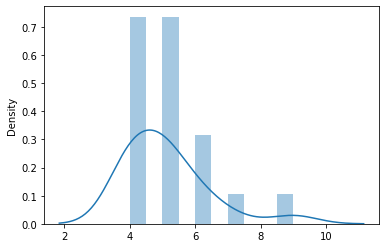

In [316]:
print("Missed Words without TieBreak")
sns.distplot(Guesses,bins=10)

In [318]:
print(np.mean(Guesses))

5.105263157894737


Avg Tries: 4.05868544600939


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


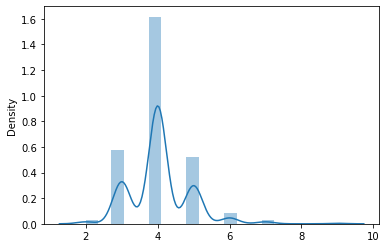

In [320]:
result2=Any_Tries_Test(words_historicals)